C:\Users\lenovo\anaconda3\envs\tfkk\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


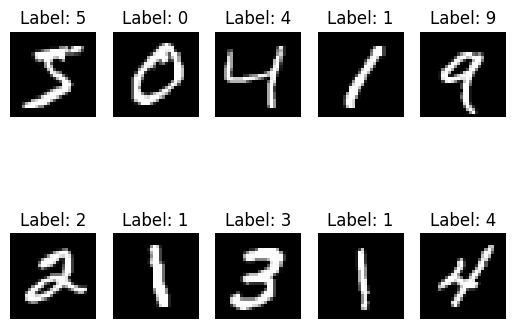

C:\Users\lenovo\anaconda3\envs\tfkk\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch: 0 Loss: 0.25839328912695037


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7600\2082987389.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # La fonction sigmoïde transforme les valeurs en probabilités


Epoch: 10 Loss: 0.1
Epoch: 20 Loss: 0.1
Epoch: 30 Loss: 0.1
Epoch: 40 Loss: 0.5472285865075693
Epoch: 50 Loss: 0.2034050414571743
Epoch: 60 Loss: 0.11585372202654214
Epoch: 70 Loss: 0.07475742649169184
Epoch: 80 Loss: 0.10689080639257227
Epoch: 90 Loss: 0.11096641086021419
Epoch: 100 Loss: 0.0551263262777082
Epoch: 110 Loss: 0.04560490358837539
Epoch: 120 Loss: 0.05026764533127635
Epoch: 130 Loss: 0.04487163507950557
Epoch: 140 Loss: 0.04995661585008134
Epoch: 150 Loss: 0.0434277929649409
Epoch: 160 Loss: 0.04384444616932663
Epoch: 170 Loss: 0.04123373937104449
Epoch: 180 Loss: 0.034671805149013774
Epoch: 190 Loss: 0.04643966014769449
Epoch: 200 Loss: 0.03364851795200263
Epoch: 210 Loss: 0.04331392223791717
Epoch: 220 Loss: 0.039497358163890765
Epoch: 230 Loss: 0.04309048940377776
Epoch: 240 Loss: 0.05657387139175853
Epoch: 250 Loss: 0.04979060684533287
Epoch: 260 Loss: 0.042615801832378564
Epoch: 270 Loss: 0.03325800603116619
Epoch: 280 Loss: 0.04280721072004263
Epoch: 290 Loss: 0.039

In [1]:
    import numpy as np
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt

    # Charger les données
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

    # Normalisation - Nous normalisons les données car cela aide le réseau à apprendre plus efficacement
    X = X / 255.0

    # Visualisation des données
    # Les données d'origine sont sous forme de vecteur. Nous les redimensionnons en images 28x28 pour les visualiser
    X_img = X.reshape(-1, 28, 28)
    # Afficher les 10 premières images
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_img[i], cmap='gray')
        plt.title(f"Label: {y[i]}")  # Afficher le label (vrai) correspondant à l'image
        plt.axis('off')
    plt.show()

    # Redimensionner y
    # On utilise OneHotEncoder pour convertir les labels en format one-hot
    one_hot_encoder = OneHotEncoder(sparse=False)
    y = one_hot_encoder.fit_transform(y.reshape(-1, 1))

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Définition de la fonction d'activation et de sa dérivée
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))  # La fonction sigmoïde transforme les valeurs en probabilités

    def derivative_sigmoid(x):
        return sigmoid(x) * (1 - sigmoid(x))  # La dérivée de la sigmoïde est utilisée lors de la rétropropagation

    # Paramètres
    n_inputs = X_train.shape[1]  # Le nombre de neurones en entrée correspond au nombre de pixels dans une image
    n_hidden = 64  # Le nombre de neurones dans la couche cachée est choisi arbitrairement
    n_outputs = y_train.shape[1]  # Le nombre de neurones de sortie correspond au nombre de classes possibles (0-9)

    # Initialisation des poids
    weights_input_hidden = np.random.normal(scale=0.1, size=(n_inputs, n_hidden))  # Poids de la couche d'entrée à la couche cachée
    weights_hidden_output = np.random.normal(scale=0.1, size=(n_hidden, n_outputs))  # Poids de la couche cachée à la couche de sortie

    learning_rate = 0.1  # Taux d'apprentissage
    epochs = 400  # Nombre d'époques d'entraînement

    for epoch in range(epochs):
        # Propagation vers l'avant
        hidden_layer_input = np.dot(X_train, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        output_layer_output = sigmoid(output_layer_input)

        # Rétropropagation
        output_error = output_layer_output - y_train
        output_delta = output_error * derivative_sigmoid(output_layer_output)

        hidden_error = np.dot(output_delta, weights_hidden_output.T)
        hidden_delta = hidden_error * derivative_sigmoid(hidden_layer_output)

        # Mise à jour des poids
        weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_delta)
        weights_input_hidden -= learning_rate * np.dot(X_train.T, hidden_delta)

        if epoch % 10 == 0:
            # Calcul et affichage de la perte à chaque 10e époque
            loss = np.mean(np.square(output_error))
            print('Epoch:', epoch, 'Loss:', loss)

    # Évaluation du modèle
    hidden_layer_input = np.dot(X_test, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    predictions = np.argmax(output_layer_output, axis=1)  # Les prédictions sont les indices des valeurs maximales de la sortie du réseau
    actual = np.argmax(y_test, axis=1)  # Les valeurs réelles sont les indices des 1 dans les labels one-hot

    # Afficher la précision du modèle sur l'ensemble de test
    print('Test Accuracy:', accuracy_score(actual, predictions))